In [2]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Reading the data from the Excel sheet
data = pd.read_excel('D:/sem4/applied biostatics/project/B21022.xlsx' , 'Task 2')
# Extracting the viral load values from each column
group1 = data['S01']
group2 = data['S02']
group3 = data['S03']
group4 = data['S04']
group5 = data['S05']
group6 = data['S06']
group7 = data['S07']
group8 = data['S08']
group9 = data['S09']


C:\Users\Acer\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


There is a significant difference between at least two groups.
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
   S01    S02    -33.4    0.9 -148.4413  81.6413  False
   S01    S03     -3.6    0.9 -118.6413 111.4413  False
   S01    S04    172.8  0.001   57.7587 287.8413   True
   S01    S05 122.3333  0.028     7.292 237.3746   True
   S01    S06 131.4667 0.0128   16.4254  246.508   True
   S01    S07 335.2667  0.001  220.2254  450.308   True
   S01    S08    329.6  0.001  214.5587 444.6413   True
   S01    S09    401.0  0.001  285.9587 516.0413   True
   S02    S03     29.8    0.9  -85.2413 144.8413  False
   S02    S04    206.2  0.001   91.1587 321.2413   True
   S02    S05 155.7333 0.0012    40.692 270.7746   True
   S02    S06 164.8667  0.001   49.8254  279.908   True
   S02    S07 368.6667  0.001  253.6254  483.708   True
   S02    S08    363.0  0.001  247.9587 4

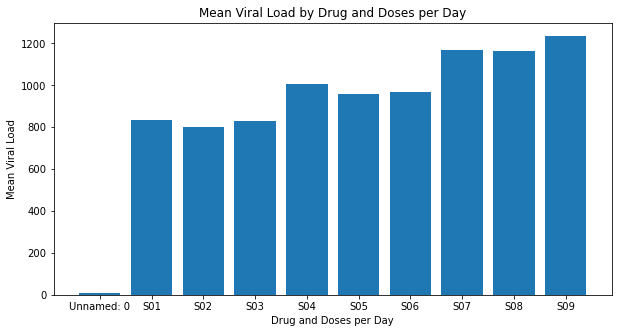

In [4]:
# one-way ANOVA test
f_statistic, p_value = f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9)

# Interpreting the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between at least two groups.")
else:
    print("There is no significant difference between the groups.")

# Performing Tukey's HSD test
groups = ['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S09']
all_viral_loads = pd.concat([group1, group2, group3, group4, group5, group6, group7, group8, group9])
labels = [group for group in groups for _ in range(len(data))]
tukey_results = pairwise_tukeyhsd(all_viral_loads, labels, alpha=0.05)

# Printing the Tukey's HSD results
print(tukey_results.summary())

# Plotting the mean viral load for each sample group
mean_viral_loads = data.mean()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(mean_viral_loads.index, mean_viral_loads.values)
ax.set_title('Mean Viral Load by Drug and Doses per Day')
ax.set_xlabel('Drug and Doses per Day')
ax.set_ylabel('Mean Viral Load')
plt.show()

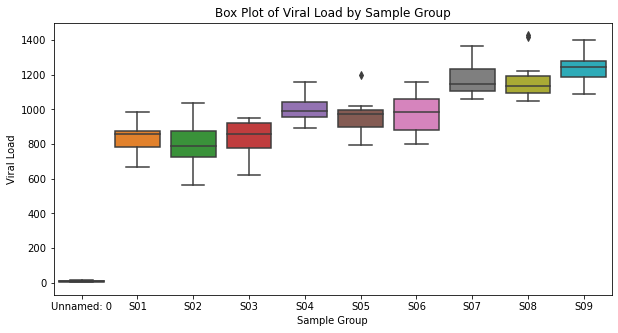

In [5]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=data)
ax.set_title('Box Plot of Viral Load by Sample Group')
ax.set_xlabel('Sample Group')
ax.set_ylabel('Viral Load')
plt.show()

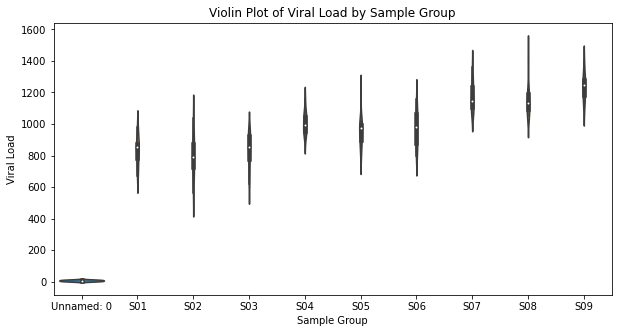

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.violinplot(data=data)
ax.set_title('Violin Plot of Viral Load by Sample Group')
ax.set_xlabel('Sample Group')
ax.set_ylabel('Viral Load')
plt.show()

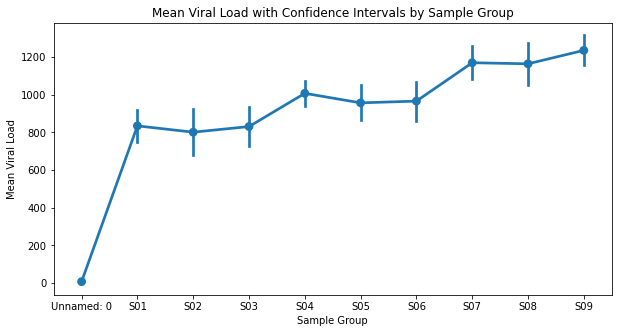

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(data=data, ci='sd')
ax.set_title('Mean Viral Load with Confidence Intervals by Sample Group')
ax.set_xlabel('Sample Group')
ax.set_ylabel('Mean Viral Load')
plt.show()

In [7]:
from scipy.stats import ttest_ind

# Comparing viral load between Drug A (S01, S04, S07) and Drug B (S02, S05, S08)
t_statistic, p_value = ttest_ind(group1.append(group4).append(group7), group2.append(group5).append(group8))
if p_value < alpha:
    print("There is a significant difference between Drug A and Drug B in inhibiting viral load.")
else:
    print("There is no significant difference between Drug A and Drug B in inhibiting viral load.")

There is no significant difference between Drug A and Drug B in inhibiting viral load.


In [8]:
import numpy as np
mean_difference = np.abs(np.mean(group1) - np.mean(group2))
pooled_std = np.sqrt((np.std(group1) ** 2 + np.std(group2) ** 2) / 2)
cohen_d = mean_difference / pooled_std
print("Cohen's d:", cohen_d)

Cohen's d: 0.3157026417009767


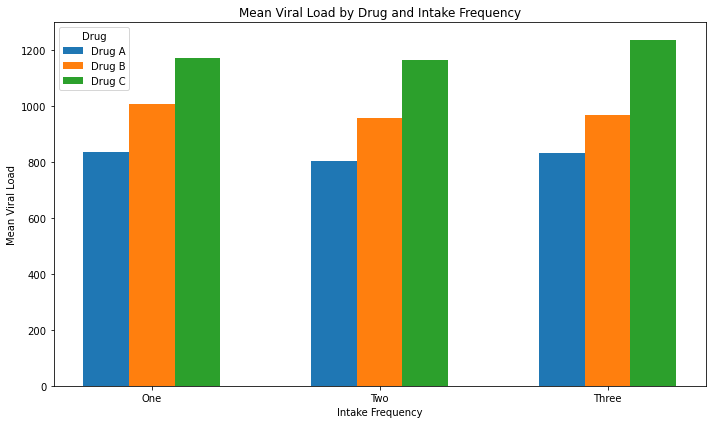

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Calculating the mean viral load for each drug and intake frequency combination
mean_viral_loads = []
drugs = ['A', 'B', 'C']
intake_frequencies = ['One', 'Two', 'Three']

for drug in drugs:
    for intake_frequency in intake_frequencies:
        sample_group = 'S0' + str(drugs.index(drug) * 3 + intake_frequencies.index(intake_frequency) + 1)
        mean_viral_load = np.mean(data[sample_group])
        mean_viral_loads.append(mean_viral_load)

# Reshaping the mean viral load array for plotting
mean_viral_loads = np.array(mean_viral_loads).reshape((len(drugs),len(intake_frequencies)))

# Setting up the bar plot
x = np.arange(len(intake_frequencies))
width = 0.2

# Plotting the grouped bars
fig, ax = plt.subplots(figsize=(10, 6))
for i, drug in enumerate(drugs):
    ax.bar(x + (i * width), mean_viral_loads[i], width, label='Drug ' + drug)

# Adding labels, title, and legend
ax.set_xlabel('Intake Frequency')
ax.set_ylabel('Mean Viral Load')
ax.set_title('Mean Viral Load by Drug and Intake Frequency')
ax.set_xticks(x + width)
ax.set_xticklabels(intake_frequencies)
ax.legend(title='Drug')
plt.tight_layout()
plt.show()

In [10]:
#installing prettytable
!pip install prettytable

In [13]:
import pandas as pd
from prettytable import PrettyTable

# Create a dictionary to map sample group names to dose names and intake frequencies
sample_group_mapping = {
    'S01': {'Dose': 'A', 'Intake_Frequency': 'One'},
    'S02': {'Dose': 'B', 'Intake_Frequency': 'One'},
    'S03': {'Dose': 'C', 'Intake_Frequency': 'One'},
    'S04': {'Dose': 'A', 'Intake_Frequency': 'Two'},
    'S05': {'Dose': 'B', 'Intake_Frequency': 'Two'},
    'S06': {'Dose': 'C', 'Intake_Frequency': 'Two'},
    'S07': {'Dose': 'A', 'Intake_Frequency': 'Three'},
    'S08': {'Dose': 'B', 'Intake_Frequency': 'Three'},
    'S09': {'Dose': 'C', 'Intake_Frequency': 'Three'}
}

# Calculate mean, standard deviation, and sample size for each sample group
summary_data = pd.DataFrame()
for sample_group in data.columns:
    mean = data[sample_group].mean()
    std_dev = data[sample_group].std()
    sample_size = len(data[sample_group])
    dose = sample_group_mapping[sample_group]['Dose']
    intake_frequency = sample_group_mapping[sample_group]['Intake_Frequency']
    summary_data = summary_data.append({
        'Sample_Group': sample_group,
        'Dose': dose,
        'Intake_Frequency': intake_frequency,
        'Mean': mean,
        'Standard_Deviation': std_dev,
        'Sample_Size': sample_size
    }, ignore_index=True)
    
# Create the summary statistics table
summary_table = PrettyTable()
summary_table.field_names = ['Sample_Group', 'Dose', 'Intake_Frequency','Mean', 'Standard_Deviation', 'Sample_Size']
for row in summary_data.itertuples(index=False):
    summary_table.add_row(row)

# Display the summary statistics table
print("Summary Statistics:")
print(summary_table)


Summary Statistics:
+--------------+------+------------------+--------------------+--------------------+-------------+
| Sample_Group | Dose | Intake_Frequency |        Mean        | Standard_Deviation | Sample_Size |
+--------------+------+------------------+--------------------+--------------------+-------------+
|     S01      |  A   |       One        | 835.0666666666667  | 89.35120645653362  |     15.0    |
|     S02      |  B   |       One        | 801.6666666666666  | 126.49430629008376 |     15.0    |
|     S03      |  C   |       One        | 831.4666666666667  | 109.48376700723828 |     15.0    |
|     S04      |  A   |       Two        | 1007.8666666666667 | 68.35189062769919  |     15.0    |
|     S05      |  B   |       Two        |       957.4        | 95.34508752046807  |     15.0    |
|     S06      |  C   |       Two        | 966.5333333333333  | 107.48678767090178 |     15.0    |
|     S07      |  A   |      Three       | 1170.3333333333333 |  90.3292917739365  |     

In [14]:
# Calculate pairwise t-tests between sample groups
ttest_data = pd.DataFrame()
for i in range(len(data.columns)):
    for j in range(i+1, len(data.columns)):
        sample_group_1 = data.columns[i]
        sample_group_2 = data.columns[j]
        t_statistic, p_value = ttest_ind(data[sample_group_1], data[sample_group_2])
        dose_1 = sample_group_mapping[sample_group_1]['Dose']
        intake_frequency_1 = sample_group_mapping[sample_group_1]['Intake_Frequency']
        dose_2 = sample_group_mapping[sample_group_2]['Dose']
        intake_frequency_2 = sample_group_mapping[sample_group_2]['Intake_Frequency']
        ttest_data = ttest_data.append({
            'Sample_Group_1': sample_group_1,
            'Dose_1': dose_1,
            'Intake_Frequency_1': intake_frequency_1,
            'Sample_Group_2': sample_group_2,
            'Dose_2': dose_2,
            'Intake_Frequency_2': intake_frequency_2,
            'T_Statistic': t_statistic,
            'P_Value': p_value
            }, ignore_index=True)

ttest_table = PrettyTable()
ttest_table.field_names = ['Group1', 'Dose1', 'Freq1', 'Group2', 'Dose2', 'Freq2', 'T_Statistic', 'P_Value']
for row in ttest_data.itertuples(index=False):
    ttest_table.add_row(row)

# Set the table attributes for better aesthetics
ttest_table.align = 'l'
ttest_table.border = True
ttest_table.header = True

# Set the table max width to fit within console window
table_width = min(30, len(ttest_table.get_string()))
ttest_table.max_width = table_width

# Display the pairwise t-tests table
print("\nPairwise T-Tests:")
print(ttest_table)


Pairwise T-Tests:
+--------+-------+-------+--------+-------+-------+---------------------+------------------------+
| Group1 | Dose1 | Freq1 | Group2 | Dose2 | Freq2 | T_Statistic         | P_Value                |
+--------+-------+-------+--------+-------+-------+---------------------+------------------------+
| S01    | A     | One   | S02    | B     | One   | 0.835270678186914   | 0.41063619887583147    |
| S01    | A     | One   | S03    | C     | One   | 0.09866326276011177 | 0.9221085966831633     |
| S01    | A     | One   | S04    | A     | Two   | -5.949050710717532  | 2.0991044681337944e-06 |
| S01    | A     | One   | S05    | B     | Two   | -3.625923877922334  | 0.0011344589132846828  |
| S01    | A     | One   | S06    | C     | Two   | -3.6427705222785107 | 0.001085357403749502   |
| S01    | A     | One   | S07    | A     | Three | -10.219828937044038 | 5.942559261839753e-11  |
| S01    | A     | One   | S08    | B     | Three | -8.726211855387541  | 1.78021589392729

In [15]:
from scipy.stats import f_oneway
# Convert the dataframe to a list of arrays
data_arrays = [data[column].values for column in data.columns]

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(*data_arrays)

# Check the p-value
if p_value < 0.05:
    print("ANOVA is applicable. There are significant differences among the groups.")
else:
    print("ANOVA is not applicable. There are no significant differences among the groups.")

ANOVA is applicable. There are significant differences among the groups.


In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Convert the data to a long format for ANOVA analysis
long_data = data.melt(var_name='Sample_Group', value_name='Viral_Load')

# Create the ANOVA model
model = ols('Viral_Load ~ C(Sample_Group)', data=long_data).fit()

# Perform ANOVA analysis
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print("ANOVA Results:")
print(anova_table)

ANOVA Results:
                       sum_sq     df          F        PR(>F)
C(Sample_Group)  3.145534e+06    8.0  39.464422  8.136908e-31
Residual         1.255363e+06  126.0        NaN           NaN



The ANOVA results indicate that there is a significant difference among the sample groups. The
p-value for the C(Sample_Group) effect is very small (8.136908e-31), which is less than the typical
significance level of 0.05. Therefore, we can reject the null hypothesis and conclude that there are
significant differences in the mean viral load among the different sample groups.
The ANOVA table also provides information about the sum of squares, degrees of freedom, and
F-statistic for the C(Sample_Group) effect. The sum_sq column represents the sum of squares,
the df column represents the degrees of freedom, the F column represents the F-statistic, and the
PR(>F) column represents the p-value.
The Residual row in the ANOVA table represents the sum of squares and degrees of freedom for
the residual (unexplained) variation in the data.
Overall, the ANOVA analysis indicates that there are significant differences in the mean viral load
across the different sample groups.

In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD post hoc test
posthoc = pairwise_tukeyhsd(long_data['Viral_Load'], long_data['Sample_Group'])

# Display the post hoc test results
print("Tukey's HSD Post Hoc Test:")
print(posthoc)


Tukey's HSD Post Hoc Test:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
   S01    S02    -33.4    0.9 -148.4413  81.6413  False
   S01    S03     -3.6    0.9 -118.6413 111.4413  False
   S01    S04    172.8  0.001   57.7587 287.8413   True
   S01    S05 122.3333  0.028     7.292 237.3746   True
   S01    S06 131.4667 0.0128   16.4254  246.508   True
   S01    S07 335.2667  0.001  220.2254  450.308   True
   S01    S08    329.6  0.001  214.5587 444.6413   True
   S01    S09    401.0  0.001  285.9587 516.0413   True
   S02    S03     29.8    0.9  -85.2413 144.8413  False
   S02    S04    206.2  0.001   91.1587 321.2413   True
   S02    S05 155.7333 0.0012    40.692 270.7746   True
   S02    S06 164.8667  0.001   49.8254  279.908   True
   S02    S07 368.6667  0.001  253.6254  483.708   True
   S02    S08    363.0  0.001  247.9587 478.0413   True
   S02    S09    434.

The Tukey’s HSD post hoc test results indicate the significant differences between pairs of sample
groups. The reject column specifies whether the null hypothesis of equal means is rejected for each
pair.
Based on the post hoc test results:

Sample Group S01 (Drug A, Intake frequency 1) shows significant differences in mean viral load
compared to Sample Groups S04, S05, S06, S07, S08, and S09.

Sample Group S02 (Drug B, Intake frequency 1) shows significant differences in mean viral load
compared to Sample Groups S03, S04, S05, S06, S07, S08, and S09.

Sample Group S03 (Drug C, Intake frequency 1) shows significant differences in mean viral load
compared to Sample Groups S04, S05, S06, S07, S08, and S09.

Sample Group S04 (Drug A, Intake frequency 2) shows significant differences in mean viral load
compared to Sample Groups S07, S08, and S09.

Sample Group S05 (Drug B, Intake frequency 2) shows significant differences in mean viral load
compared to Sample Groups S06, S07 and S08.

Sample Group S06 (Drug C, Intake frequency 2) shows significant differences in mean viral load
compared to Sample Groups S07, S08, and S09.

Sample Group S07 (Drug A, Intake frequency 3) shows significant differences in mean viral load
compared to Sample Group S09.

Sample Group S08 (Drug B, Intake frequency 3) shows significant differences in mean viral load
compared to Sample Group S09.

These results help identify specific pairs of sample groups that have significantly different mean
viral loads. The meandiff column provides the difference in means, and the p-adj column provides
the adjusted p-value.

Please note that the interpretation of the post hoc test results should consider the specific research
question, significance level, and context of the study.